In [36]:
import numpy as np
import matplotlib.pyplot as plt
n = 50
X = np.arange(0, n, 1)
Y = np.arange(0, n, 1)
U, V = np.meshgrid(X, Y)
Vmax = 100
Vperturb = 100
V0 = np.zeros((n,n))
for i in range(0,n):
    V0[i,:] = Vmax*i/n #the background is electrical potential

In [37]:
def gaussian(A0,x, y, x0, y0, sigma): #Gaussian for the peak
    return A0*np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))
def asymmetric_gaussian(A0, x, y, x0, y0, sigma_x, sigma_y):
    return A0 * np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))
for i in range(0, n):
    for j in range(0, n):
        V0[i, j] += asymmetric_gaussian(-Vperturb, i, j, n/3, n*2/3, n/7, n/10)
        V0[i, j] += asymmetric_gaussian(+Vperturb, i, j, n*2/3, n/3, n/10, n/7)
#for i in range(0,n):
#    for j in range(0,n):
#        V0[i,j] += gaussian(-Vperturb,i,j, n/3,n*2/3, n/7)
#        V0[i,j] += gaussian(+Vperturb,i,j, n*2/3,n/3, n/7)

In [38]:
Vgrad = np.zeros((n,n,2))
#Vgrad = np.gradient(V0)
for i in range(0,n-1):
    for j in range(0,n-1):
        Vgrad[i,j,0] = V0[i,j+1] - V0[i,j]
        Vgrad[i,j,1] = V0[i+1,j] - V0[i,j]
#print(Vgrad[1])

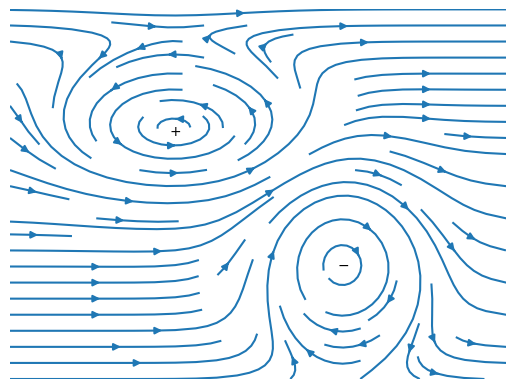

In [39]:
fig, ax = plt.subplots()
ax.streamplot(X, Y, Vgrad[:, :, 1], -Vgrad[:, :, 0], density=0.8)
plt.axis('off')
plt.text(n/3. - 1, n*2./3. - 1, '$+$')
plt.text(n*2./3. -1, n/3. - 2, '$-$')
plt.savefig('images/streamplot.pdf', format='pdf', bbox_inches='tight')
plt.show()

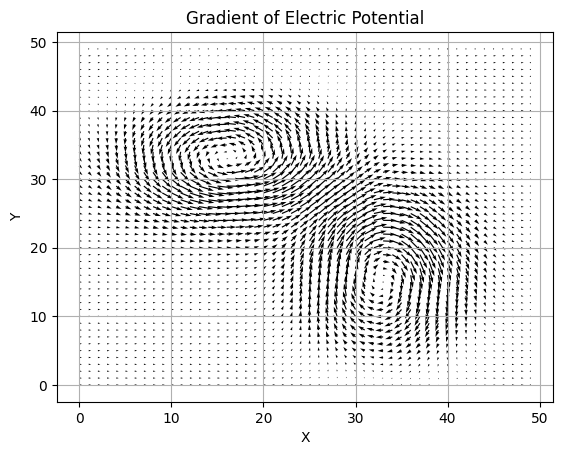

In [40]:
plt.figure()
plt.quiver(X, Y, Vgrad[:, :, 1], -Vgrad[:, :, 0])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient of Electric Potential')
plt.grid(True)

plt.show()
